![Sample Image](heartdisease.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


## Check Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [7]:
df.duplicated().sum()

18078

In [8]:
#drop duplicated data
df.drop_duplicates(inplace=True)

In [9]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## EDA

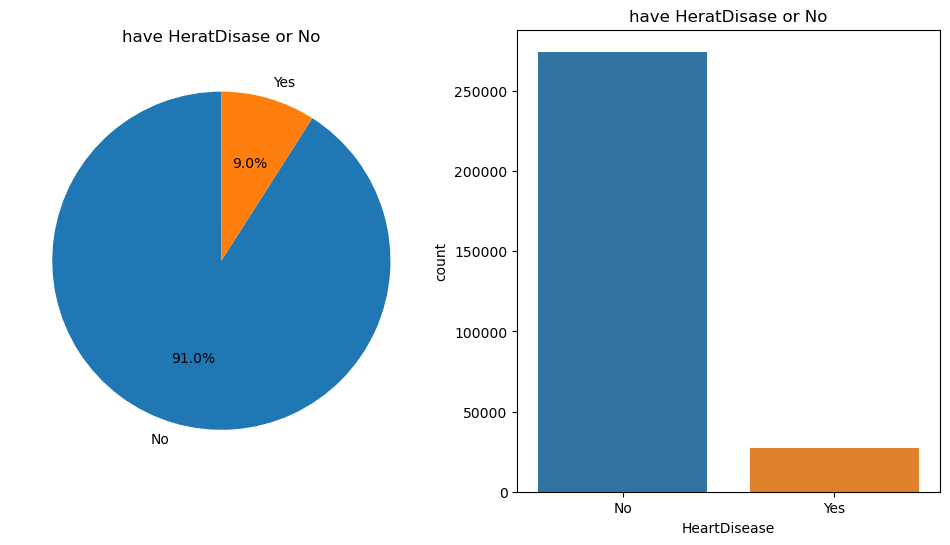

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(df['HeartDisease'].value_counts(), labels=df['HeartDisease'].value_counts().index,autopct='%1.1f%%',startangle=90)
axs[0].set_title('have HeratDisase or No')

sns.countplot(x='HeartDisease',data=df, ax=axs[1])
axs[1].set_title('have HeratDisase or No')
plt.show()

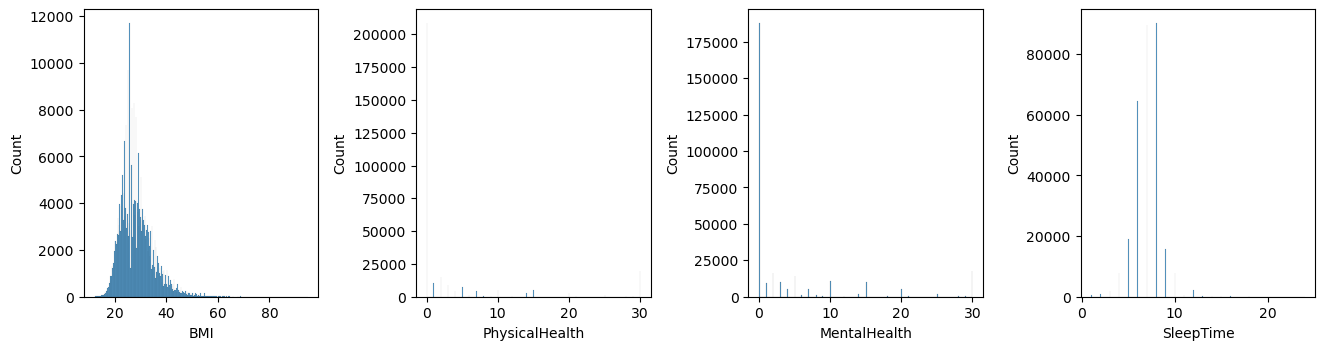

In [11]:
fig = plt.figure(figsize=(20,17))
counter=0
for i in df.columns:
    if df[i].dtype != 'object':
        sub = fig.add_subplot(5,6,counter+1)
        g = sns.histplot(x=i,data=df)
        plt.tight_layout()
        counter = counter + 1

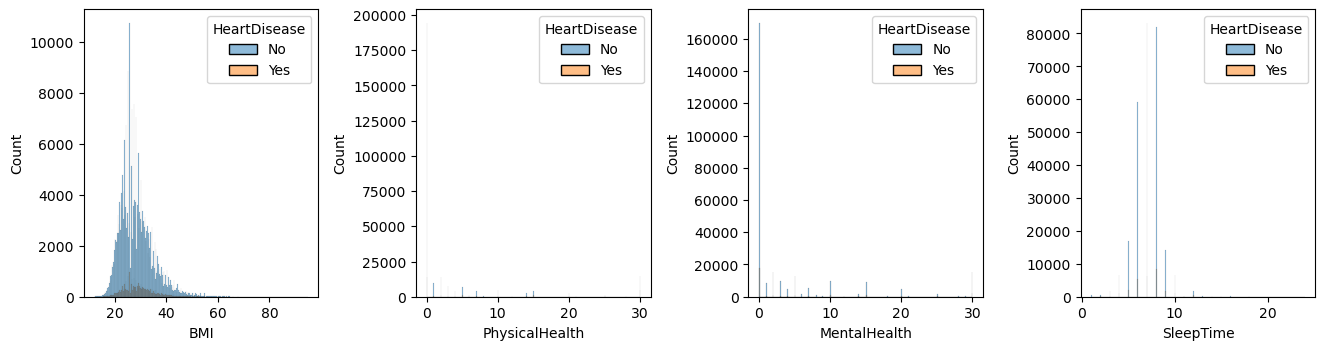

In [12]:
fig = plt.figure(figsize=(20,17))
counter=0
for i in df.columns:
    if df[i].dtype != 'object':
        sub = fig.add_subplot(5,6,counter+1)
        g = sns.histplot(x=i,data=df,hue='HeartDisease')
        plt.tight_layout()
        counter = counter + 1

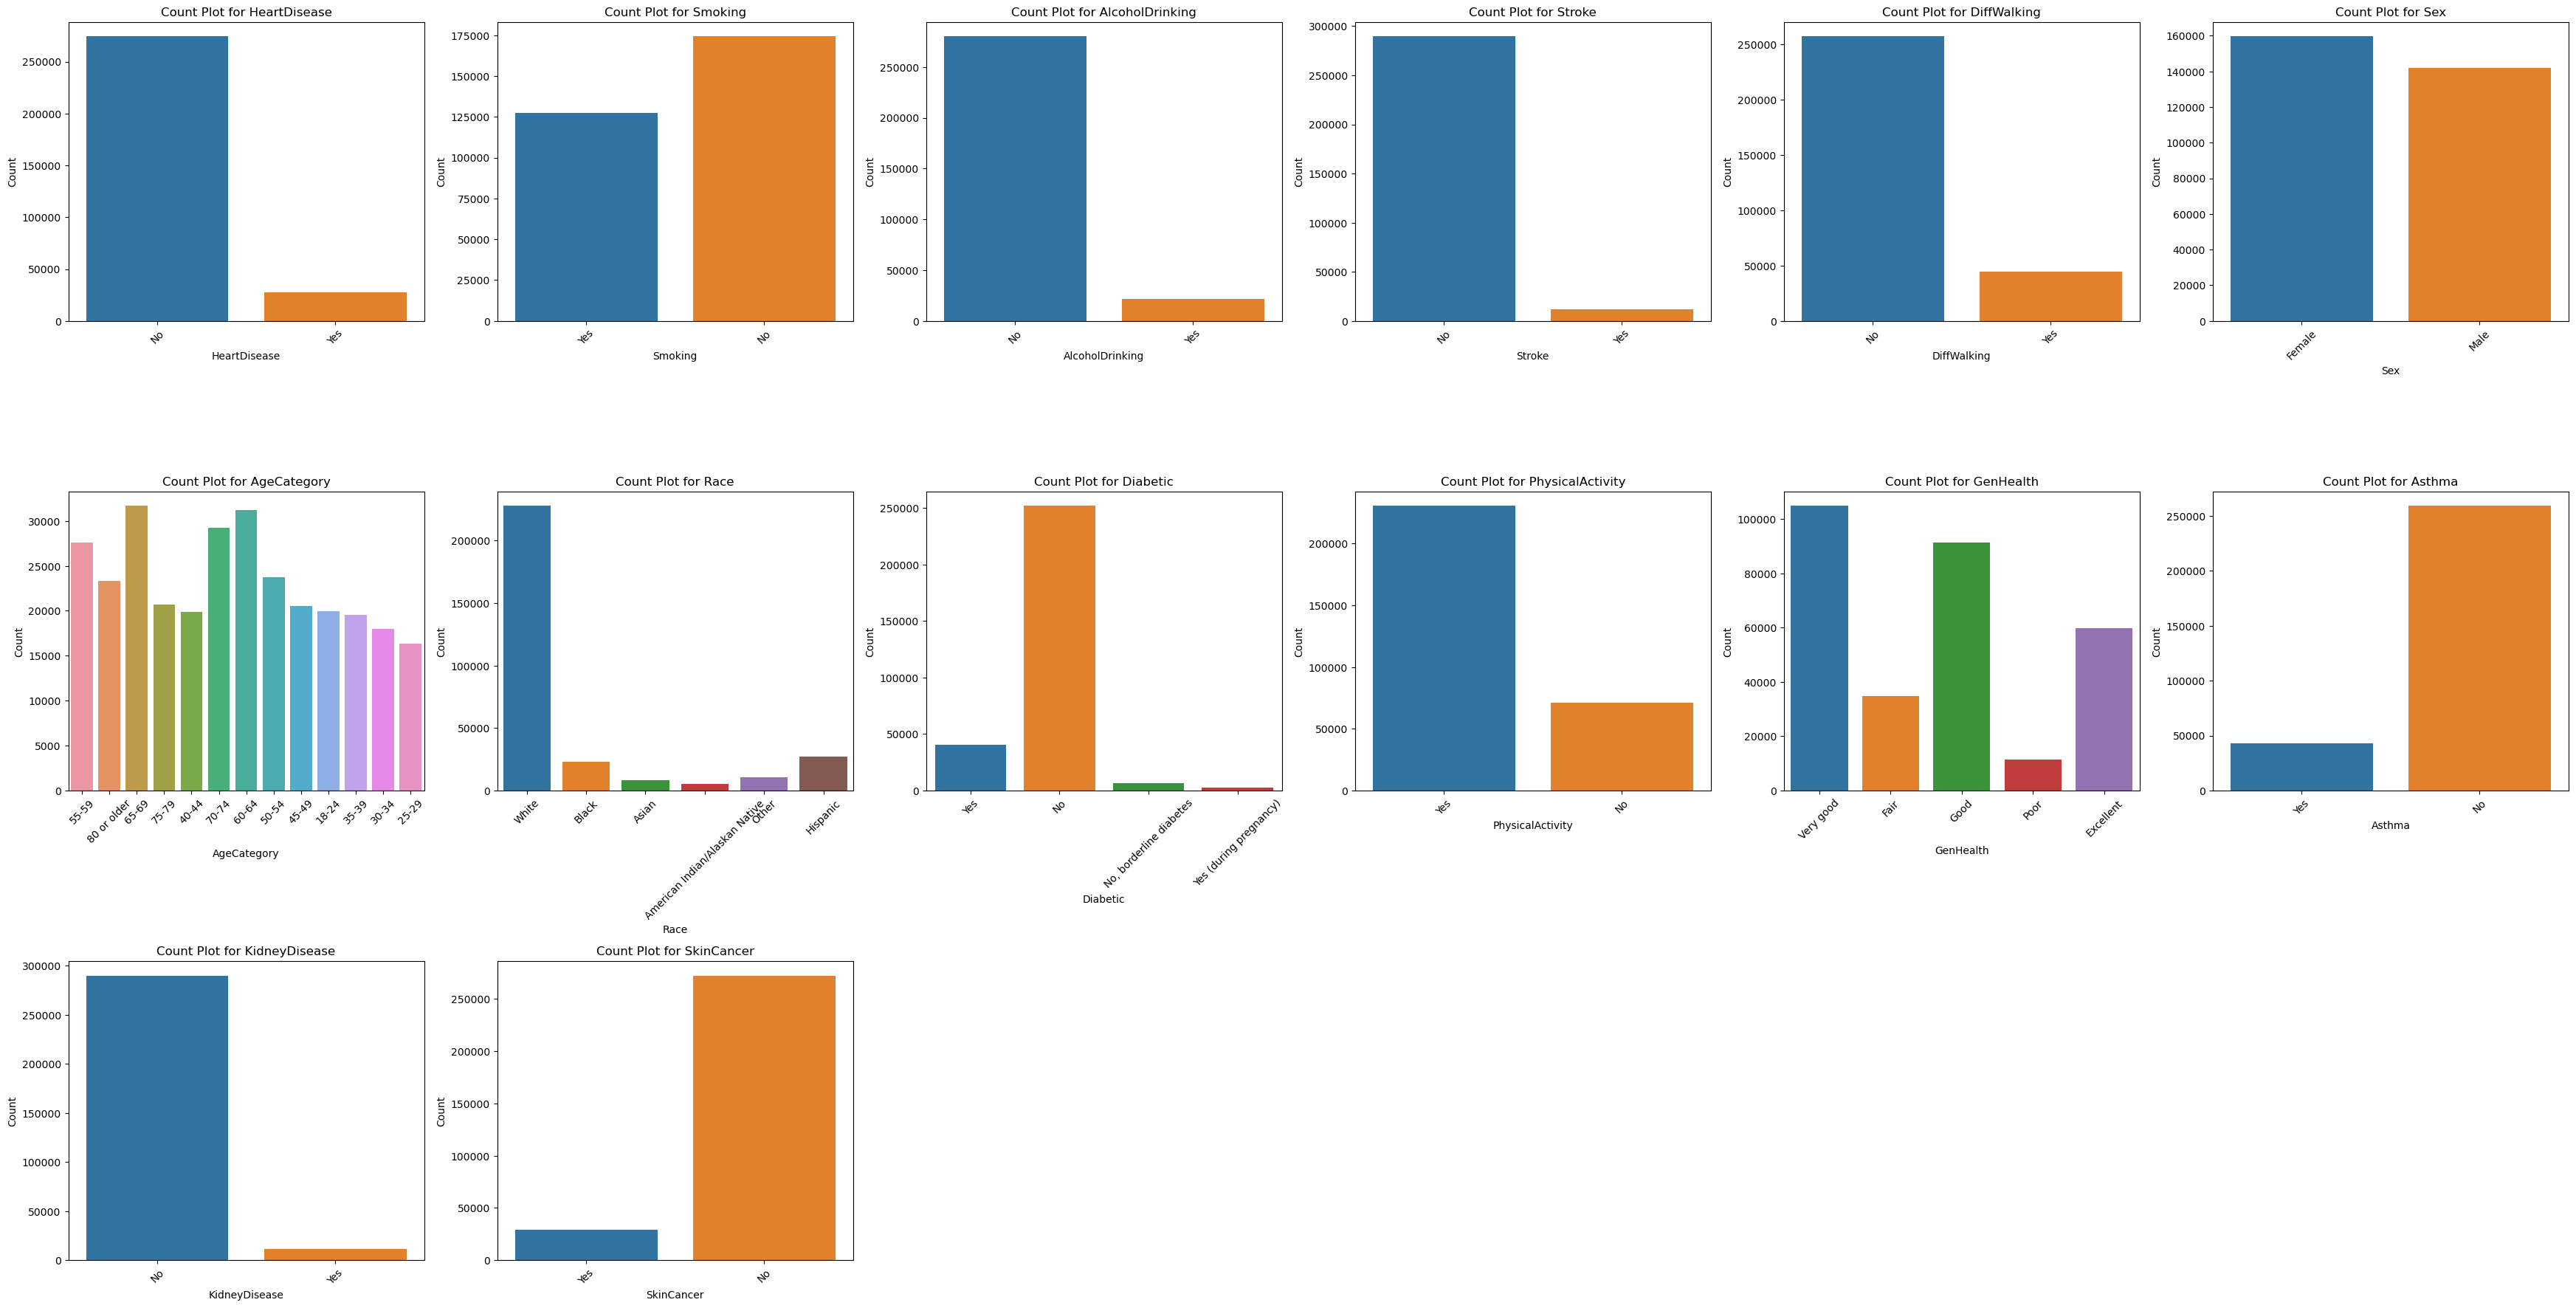

In [13]:
fig = plt.figure(figsize=(35,30))
counter=0
for i in df.columns:
    if df[i].dtype == 'object':
        sub = fig.add_subplot(5,6,counter+1)
        g = sns.countplot(x=i,data=df)
        plt.title(f'Count Plot for {i}')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.tight_layout()
        counter = counter + 1

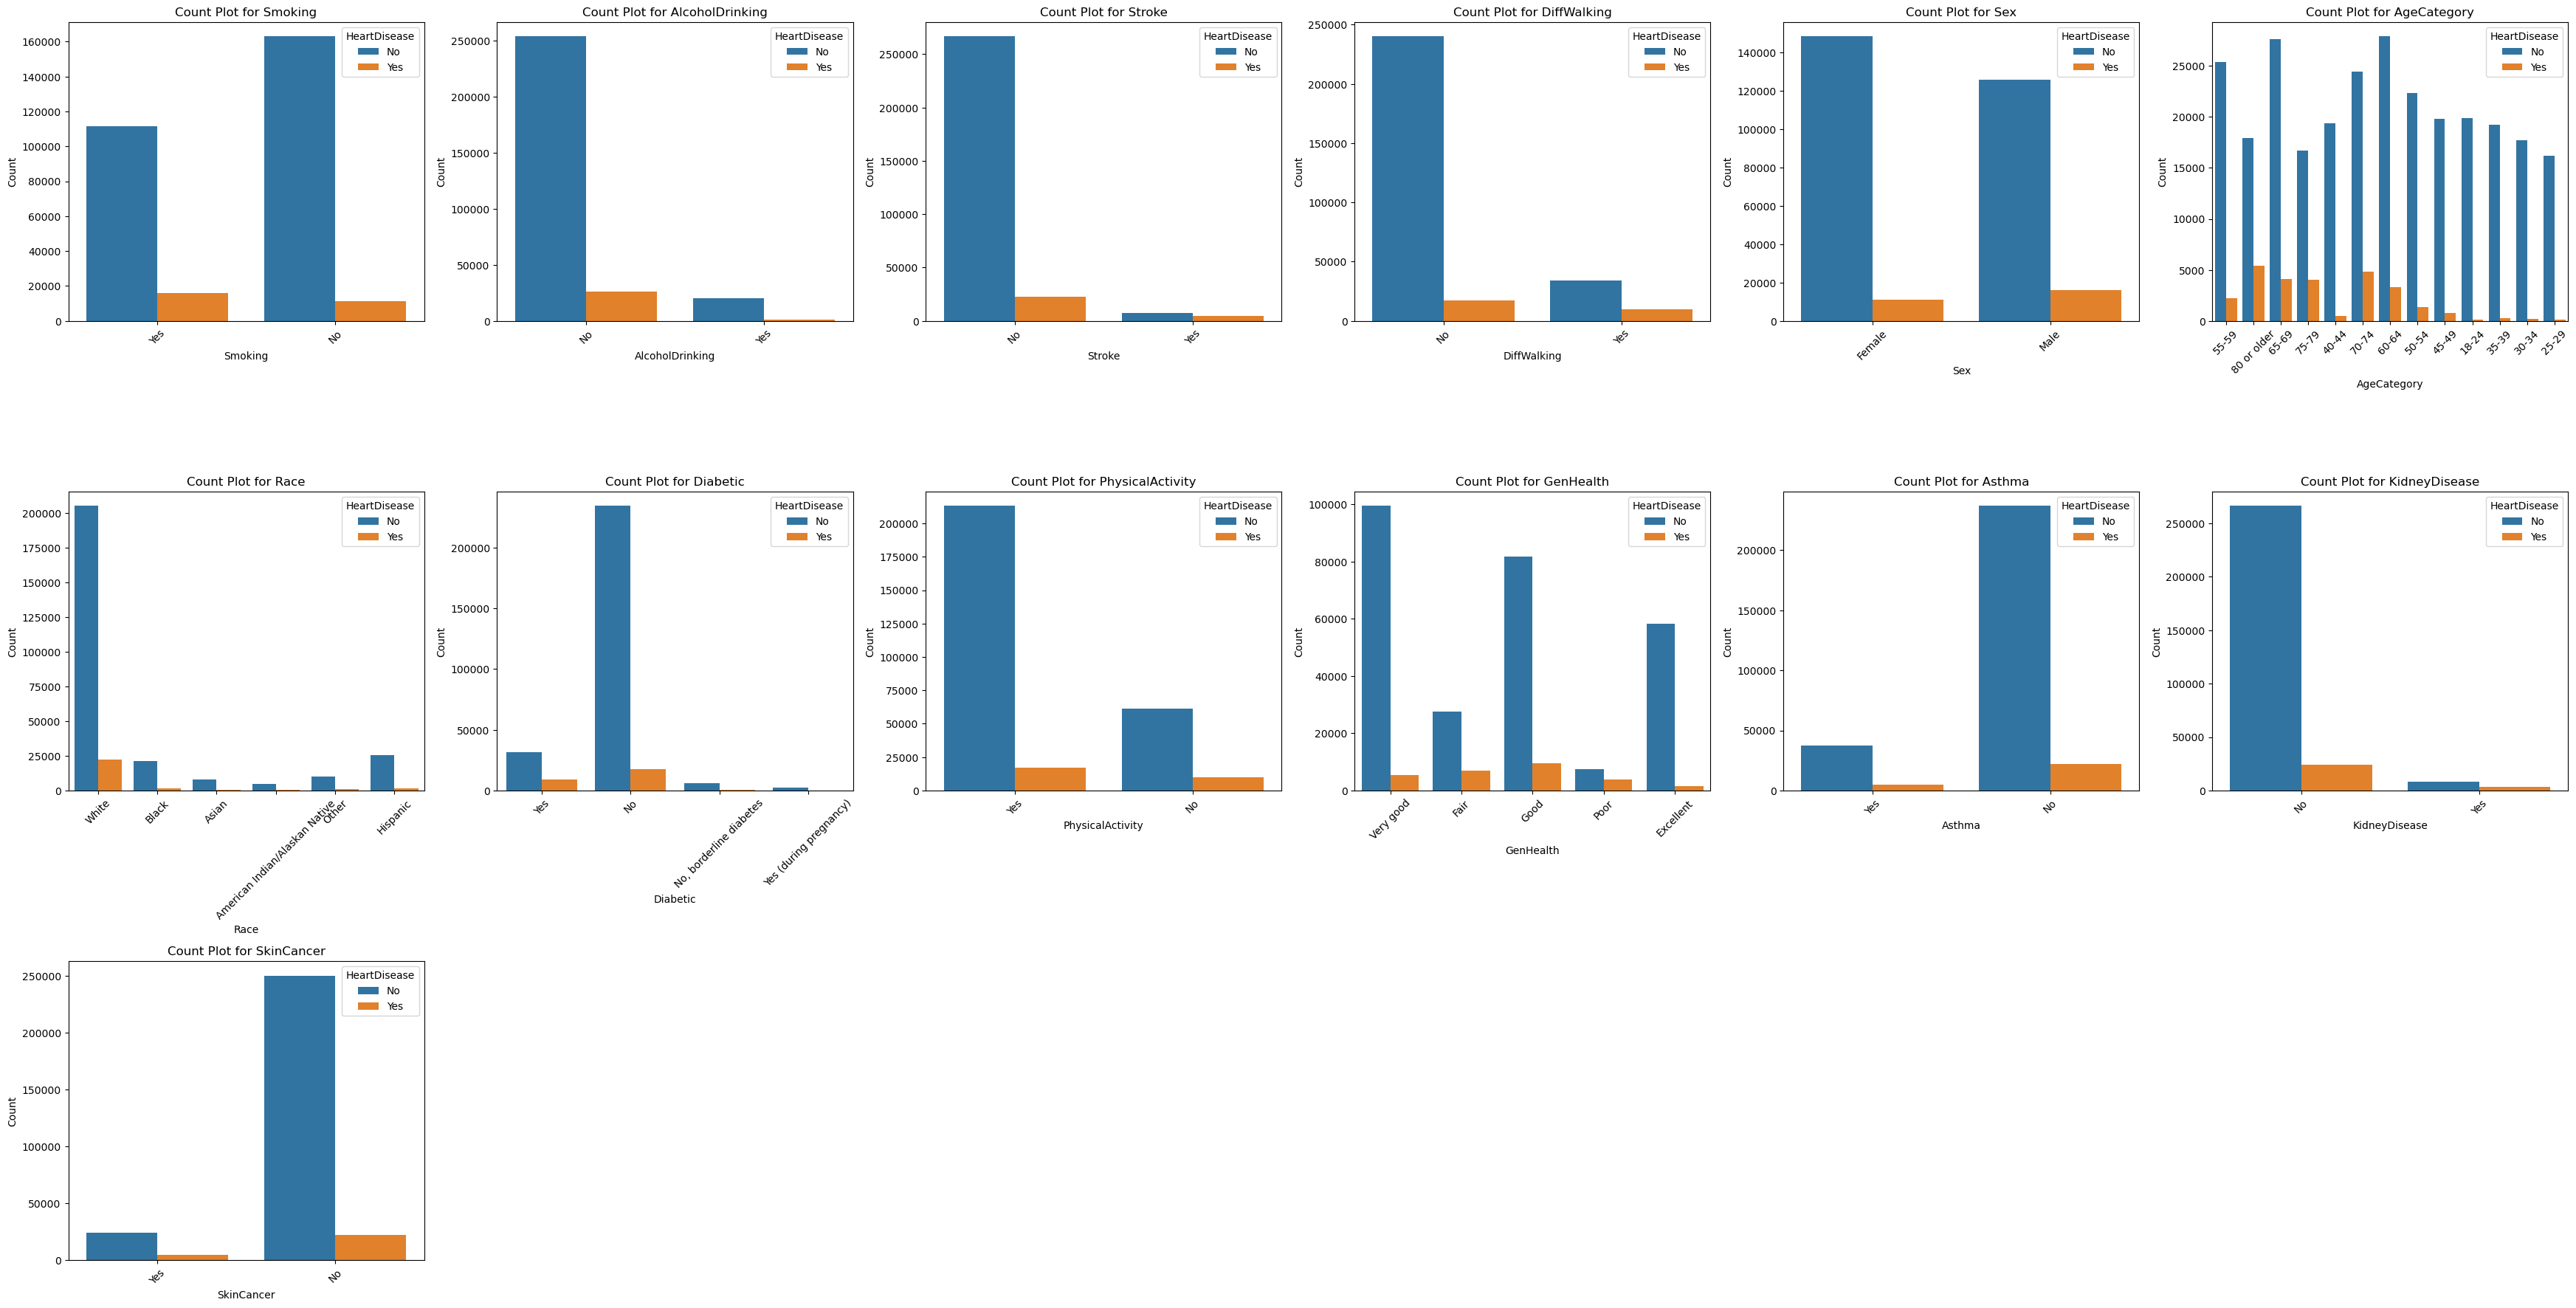

In [14]:
fig = plt.figure(figsize=(35,30))
counter=0
for i in df.columns:
    if df[i].dtype == 'object' and i!='HeartDisease':
        sub = fig.add_subplot(5,6,counter+1)
        g = sns.countplot(x=i,data=df,hue='HeartDisease')
        plt.title(f'Count Plot for {i}')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.tight_layout()
        counter = counter + 1

## Preprocessing

In [15]:
df2=df.copy()


In [16]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [17]:
def convert_age(age):
    if 'or older' in age:
        return 80  # Assume 80 as a reasonable number for '80 or older'
    else:
        # Split the age range and calculate the average
        age_range = age.split('-')
        return (int(age_range[0]) + int(age_range[1])) / 2

# Apply the function to convert the age ranges to numerical values
df2['age_ave'] = df2['AgeCategory'].apply(convert_age)


In [18]:
df2['age_ave'].unique()

array([57., 80., 67., 77., 42., 72., 62., 52., 47., 21., 37., 32., 27.])

In [19]:
df2['age_ave'].info()

<class 'pandas.core.series.Series'>
Int64Index: 301717 entries, 0 to 319794
Series name: age_ave
Non-Null Count   Dtype  
--------------   -----  
301717 non-null  float64
dtypes: float64(1)
memory usage: 4.6 MB


In [20]:
df2=df2.drop(columns=['AgeCategory'])

In [21]:
df['Diabetic'].unique()


array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [22]:
def convert_Diabetic(Diabetic):
    if 'No, borderline diabetes' in Diabetic:
        return 'No'
    elif 'Yes (during pregnancy)' in Diabetic:
        return 'Yes'
    else:
        return Diabetic  # Return the value as-is for unmatched cases

# Apply the function to convert the age ranges to numerical values
df2['Diabetic'] = df2['Diabetic'].apply(convert_Diabetic)

In [23]:
df2['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder

cat=['Sex','HeartDisease','Smoking','AlcoholDrinking','Stroke','PhysicalActivity','DiffWalking','Diabetic','Asthma','KidneyDisease','SkinCancer','Race']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat:
    df2[col] = label_encoder.fit_transform(df[col])

df2


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,age_ave
0,0,16.60,1,0,0,3,30,0,0,5,2,1,Very good,5,1,0,1,57.0
1,0,20.34,0,0,1,0,0,0,0,5,0,1,Very good,7,0,0,0,80.0
2,0,26.58,1,0,0,20,30,0,1,5,2,1,Fair,8,1,0,0,67.0
3,0,24.21,0,0,0,0,0,0,0,5,0,0,Good,6,0,0,1,77.0
4,0,23.71,0,0,0,28,0,1,0,5,0,1,Very good,8,0,0,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,3,2,0,Fair,6,1,0,0,62.0
319791,0,29.84,1,0,0,0,0,0,1,3,0,1,Very good,5,1,0,0,37.0
319792,0,24.24,0,0,0,0,0,0,0,3,0,1,Good,6,0,0,0,47.0
319793,0,32.81,0,0,0,0,0,0,0,3,0,0,Good,12,0,0,0,27.0


In [26]:
df2['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [27]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good', 'Excellent']])

# Fit and transform the 'Race' column
df2['GenHealth'] = encoder.fit_transform(df2[['GenHealth']])


In [28]:
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,age_ave
0,0,16.60,1,0,0,3,30,0,0,5,2,1,3.0,5,1,0,1,57.0
1,0,20.34,0,0,1,0,0,0,0,5,0,1,3.0,7,0,0,0,80.0
2,0,26.58,1,0,0,20,30,0,1,5,2,1,1.0,8,1,0,0,67.0
3,0,24.21,0,0,0,0,0,0,0,5,0,0,2.0,6,0,0,1,77.0
4,0,23.71,0,0,0,28,0,1,0,5,0,1,3.0,8,0,0,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,3,2,0,1.0,6,1,0,0,62.0
319791,0,29.84,1,0,0,0,0,0,1,3,0,1,3.0,5,1,0,0,37.0
319792,0,24.24,0,0,0,0,0,0,0,3,0,1,2.0,6,0,0,0,47.0
319793,0,32.81,0,0,0,0,0,0,0,3,0,0,2.0,12,0,0,0,27.0


## Split Data

In [29]:
X=df2.drop(columns=['HeartDisease'])
y=df2['HeartDisease']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train, X_val ,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

## StanderScaler

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Supervised Learning Models

### Train Data

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_val_pred = lr.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print('Accurace:',accuracy,', Precision:',precision,', Recall:',recall,', F1:',f1)

Accurace: 0.9122320041429312 , Precision: 0.88605541234005 , Recall: 0.9122320041429312 , F1: 0.8845559324880142


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42) 
# Fit the model on the training data
model.fit(X_train_scaled, y_train)
# Make predictions on the test data
y_val_pred = model.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print('Accurace:',accuracy,', Precision:',precision,', Recall:',recall,', F1:',f1)

Accurace: 0.901460383221129 , Precision: 0.8682329787890042 , Recall: 0.901460383221129 , F1: 0.8788356158085057


### Evaluate Data

In [35]:
'''from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}

# Set up the Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

'''

"from sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid for Grid Search\nparam_grid = {\n    'n_estimators': [50, 100, 200],           # Number of trees in the forest\n    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at each split\n    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree\n    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node\n    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node\n}\n\n# Set up the Grid Search\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid,\n                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)\n\n# Fit the model to the training data\ngrid_search.fit(X_train_scaled, y_train)\n\nbest_estimator = grid_search.best_estimator_\nbest_params = grid_search.best_params_\n\n"

In [36]:
# Make predictions on the test data using the best estimator
y_pred = model.predict(X_test_scaled)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54894
           1       0.34      0.11      0.17      5450

    accuracy                           0.90     60344
   macro avg       0.63      0.55      0.56     60344
weighted avg       0.87      0.90      0.88     60344



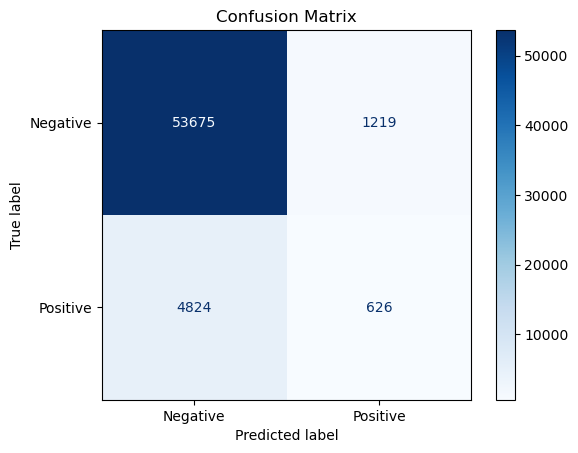

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


## UnSupervised Learnning Models

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
data_scaled = scaler.fit_transform(df2)


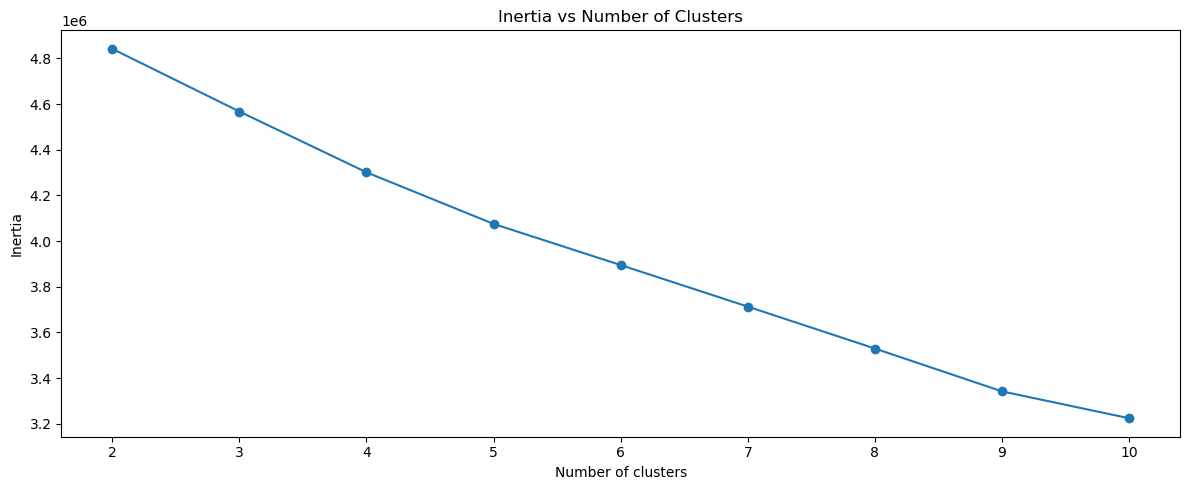

In [40]:
from sklearn.cluster import KMeans

# Define range of cluster numbers
cluster_range = range(2, 11)  

inertia = []

# Perform K-means clustering for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    # Append inertia
    inertia.append(kmeans.inertia_)

# Plot Inertia
plt.figure(figsize=(12, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.tight_layout()
plt.show()

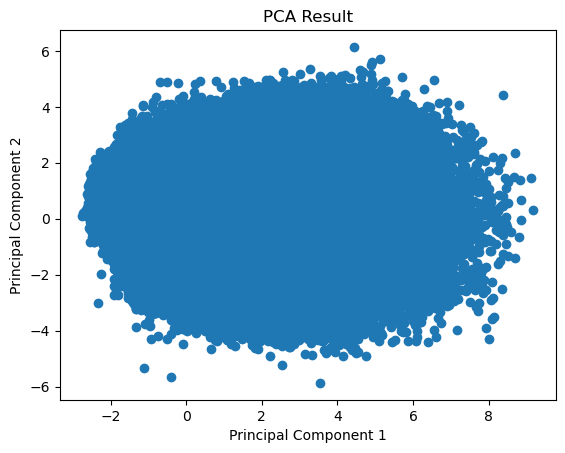

In [41]:
from sklearn.decomposition import PCA


# PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_pca = pca.fit_transform(data_scaled)

# Plotting the PCA result
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
